# Hola &#x1F600;,

Soy **Hesus Garcia** – **"Soy el único Hesus que conoces (y probablemente conocerás) 🌟"** – Sí, como "Jesús", pero con una H que me hace único. Puede sonar raro, pero créeme, ¡no lo olvidarás! Como tu revisor en Triple-Ten, estoy aquí para guiarte y ayudarte a mejorar tu código. Si algo necesita un ajuste, no hay de qué preocuparse; ¡aquí estoy para hacer que tu trabajo brille con todo su potencial! ✨

Cada vez que encuentre un detalle importante en tu código, te lo señalaré para que puedas corregirlo y así te prepares para un ambiente de trabajo real, donde el líder de tu equipo actuaría de manera similar. Si en algún momento no logras solucionar el problema, te daré más detalles para ayudarte en nuestra próxima oportunidad de revisión.

Es importante que cuando encuentres un comentario, **no los muevas, no los modifiques, ni los borres**.

---

### Formato de Comentarios

Revisaré cuidadosamente cada implementación en tu notebook para asegurar que cumpla con los requisitos y te daré comentarios de acuerdo al siguiente formato:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
    
<b>Éxito</b> - ¡Excelente trabajo! Esta parte está bien implementada y contribuye significativamente al análisis de datos o al proyecto. Continúa aplicando estas buenas prácticas en futuras secciones.
    
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
    
<b>Atención</b> ⚠️ - Este código está correcto, pero se puede optimizar. Considera implementar mejoras para que sea más eficiente y fácil de leer. Esto fortalecerá la calidad de tu proyecto.
    
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
    
<b>A resolver</b> ❗ - Aquí hay un problema o error en el código que es necesario corregir para aprobar esta sección. Por favor, revisa y corrige este punto, ya que es fundamental para la validez del análisis y la precisión de los resultados.
    
</div>

---

Al final de cada revisión, recibirás un **Comentario General del Revisor** que incluirá:

- **Aspectos positivos:** Un resumen de los puntos fuertes de tu proyecto.
- **Áreas de mejora:** Sugerencias sobre aspectos donde puedes mejorar.
- **Temas adicionales para investigar:** Ideas de temas opcionales que puedes explorar por tu cuenta para desarrollar aún más tus habilidades.

Estos temas adicionales no son obligatorios en esta etapa, pero pueden serte útiles para profundizar en el futuro.

---


Esta estructura en viñetas facilita la lectura y comprensión de cada parte del comentario final.

También puedes responderme de la siguiente manera si tienes alguna duda o quieres aclarar algo específico:


<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
    
Aquí puedes escribir tu respuesta o pregunta sobre el comentario.
    
</div>


**¡Empecemos!** &#x1F680;



# Paso 1. Carga de librerías y acceso a datos.

In [67]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st

In [68]:
#Accedemos a los datos
visits = pd.read_csv('/datasets/visits_log_us.csv')
orders = pd.read_csv('/datasets/orders_log_us.csv')
costs = pd.read_csv('/datasets/costs_us.csv')


In [69]:
#Hacemos un exploración inicial de los datos.

visits.info()
visits.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


Como observaciones parece que no tenemos datos ausentes, por otro lado tenemos los registros de tiempo (End y Start) como Objectos por lo que probablemente sea conveniente convertirlos a datetime. Llama la atención uint64 que desconocía aunque parece un similar a int64 por lo que por homegeneidad consideraremos convertirlo. 

In [70]:
orders.info()
orders.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


Como observaciones parece que no tenemos datos ausentes, por otro lado tenemos los registros de compra (Buy) como Objecto por lo que probablemente sea conveniente convertirlos a datetime. Se debe considerar si convertir Revenue de float a enteros y nuevamente se presenta en Uid el Dtype uint64.

In [71]:
costs.info()
costs.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


Como observaciones parece que no tenemos datos ausentes. Llama la atenciòn que el source_id està en números(int64) por lo que habría que revisar ese detalle.Por otro lado identificamos que que la fecha está en strings por lo que habrá que formatearlo al tipo de datos correcto.
Los costos también están en decimales por lo que habrá que considerar qué tratamiento darle a esta info.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>

<b>Éxito</b> - Excelente inicio en la carga de datos y exploración inicial. La importación de las librerías necesarias está bien estructurada, y la revisión de los datos con info() y head() es una práctica fundamental para identificar posibles problemas. Las observaciones sobre las columnas como las fechas y los tipos de datos (uint64) muestran atención al detalle y un enfoque lógico para la limpieza de datos.

</div>

## 1.1 Optimizaciòn de datos

In [72]:
#Renombraremos las columnas con minúsculas para los 2 Df que lo requieren visits y orders.
visits_columns={
    "Device":"device",
    "End Ts":"end_ts",
    "Source Id":"source_id",
    "Start Ts":"start_ts",
    "Uid":"uid",
}

orders_columns={
    "Buy Ts":"buy_ts",
    "Revenue":"revenue",
    "Uid":"uid",
}

visits.rename(columns = visits_columns, inplace = True)
orders.rename(columns = orders_columns, inplace = True)

print(visits.columns)
print()
print(orders.columns)

Index(['device', 'end_ts', 'source_id', 'start_ts', 'uid'], dtype='object')

Index(['buy_ts', 'revenue', 'uid'], dtype='object')


In [73]:
#Previo a realizar cambios en los tipos de datos, revisamos si tenemos Nans o duplicados en algunas de las columnas y filas de nuestros 3 dataframes.

visits[['device','end_ts','source_id','start_ts','uid']].isna().sum()

device       0
end_ts       0
source_id    0
start_ts     0
uid          0
dtype: int64

In [74]:
visits[['device','end_ts','source_id','start_ts','uid']].duplicated().sum()

0

In [75]:
orders[['buy_ts','revenue','uid']].isna().sum()

buy_ts     0
revenue    0
uid        0
dtype: int64

In [76]:
orders[['buy_ts','revenue','uid']].duplicated().sum()

0

In [77]:
costs[['source_id','dt','costs']].isna().sum()

source_id    0
dt           0
costs        0
dtype: int64

In [78]:
costs[['source_id','dt','costs']].duplicated().sum()

0

In [79]:
#Comprobado que no hay Nans ni duplicados procedemos a cambiar los tipos de datos en aquellas columnas que consideramos.
visits['end_ts'] = pd.to_datetime(visits['end_ts'])
visits['start_ts'] = pd.to_datetime(visits['start_ts'])
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   device     359400 non-null  object        
 1   end_ts     359400 non-null  datetime64[ns]
 2   source_id  359400 non-null  int64         
 3   start_ts   359400 non-null  datetime64[ns]
 4   uid        359400 non-null  uint64        
dtypes: datetime64[ns](2), int64(1), object(1), uint64(1)
memory usage: 13.7+ MB


In [80]:
orders['buy_ts'] = pd.to_datetime(orders['buy_ts'])
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   buy_ts   50415 non-null  datetime64[ns]
 1   revenue  50415 non-null  float64       
 2   uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


In [81]:
costs['dt'] = pd.to_datetime(costs['dt'])
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


## 1.2 Integración de tablas
Siguiendo una metodología ETL donde se ha hecho una preparación muy inicial de datos, para determinar cómo continuar respondiendo a nuestras interrogantes primero analizamos cómo manipular e integrar nuestros datos, pensando en la lógica e utilidad de las tablas intermedias y su impacto en la generación de datos y  visualizaciones.

#Generamos un ejemplo de diagrama ER para visualizar las relaciones.
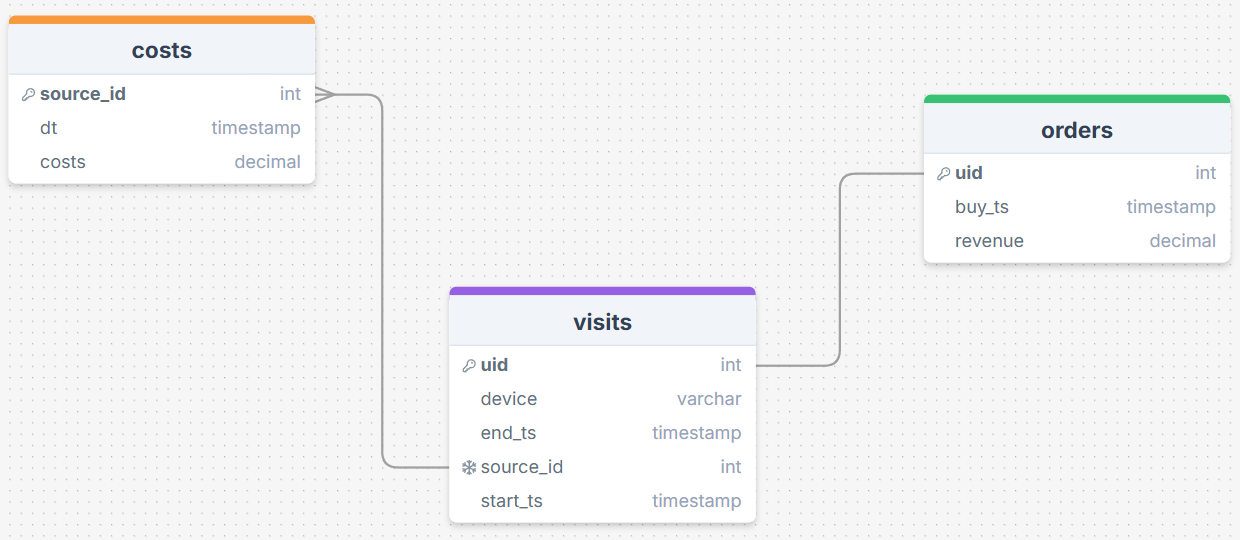

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>

<b>Éxito</b> - ¡Gran trabajo en esta sección! El proceso de renombrar columnas para estandarizar el formato y facilitar el manejo de datos demuestra una atención al detalle importante en la preparación de los datos. La comprobación de valores ausentes y duplicados es un paso crítico que has implementado de manera efectiva. Además, es excelente que hayas incorporado un gráfico para mostrar la relación entre los datos mediante un diagrama ER. Este enfoque visual no solo mejora la comprensión de las relaciones entre las tablas, sino que también ayuda a planificar mejor las siguientes etapas del análisis.

</div>

## 2. Informes y calculo de métricas

# Visitas

In [82]:
#Visitas:¿Cuántas personas lo usan cada día, semana y mes?
#Procedemos a calcular las métricas de visitas para el día, la semana y el mes.
#Utilizaremos el método isocalendar() agregando las columnas de año, semana y dia al Df previo al càlculo de promedios

visits['sesion_año'] = visits['start_ts'].dt.isocalendar().year
visits['sesion_mes'] = visits['start_ts'].dt.month
visits['sesion_semana'] = visits['start_ts'].dt.isocalendar().week
visits['sesion_fecha'] = visits['start_ts'].dt.date

# Se procede a calcular las métricas por periodos de tiempo específicos.

diario_total = visits.groupby('sesion_fecha').agg({'uid':'nunique'}).mean()
semanal_total = visits.groupby(['sesion_año','sesion_semana']).agg({'uid':'nunique'}).mean()
mensual_total = visits.groupby(['sesion_año','sesion_mes']).agg({'uid':'nunique'}).mean()

print(diario_total.round())
print(semanal_total.round())
print(mensual_total.round())



uid    908.0
dtype: float64
uid    5716.0
dtype: float64
uid    23228.0
dtype: float64


In [83]:
#Procedemos a calcular cuantas sesiones hay por día tomando en cuenta que un usuario puede tener más de una sesión:
sesiones_diarias = visits.groupby('sesion_fecha')['uid'].count().mean()
print(sesiones_diarias.round())


987.0


0    1.0
dtype: float64


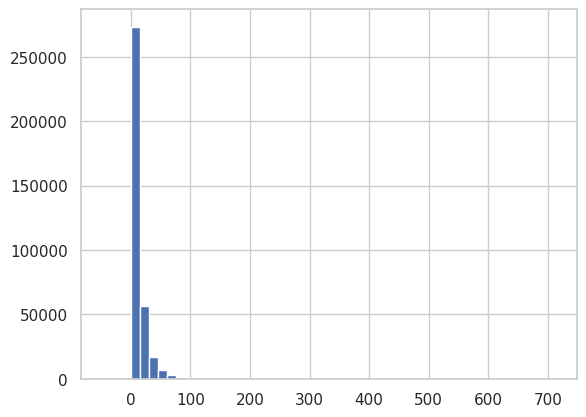

In [84]:
# Procedemos a calcular la media de duracion de las sesiones para cada usuario, por lo que primero calculamos la duraciòn de cada sesiòn en minutos,para posteriormente calcular el promedio de duraciòn de sesiòn general por usuario.
duracion_sesion = (visits['end_ts'] - visits['start_ts']).dt.total_seconds()/60
duracion_sesion.hist(bins=50)

#Al observar nuestro histograma destectamos que la distribución no es normal por lo que se recomienda mejor tomar la moda como cifra:
print(duracion_sesion.mode())

In [85]:
#Calculamos el sticky factor o factor de adherencia (FA) para saber con qué frecuencia regresan nuestros usuarios a la aplicación:
FA_semanal = 908/5716*100
FA_mensual= 908/23228*100

print('El FA semanal es:',FA_semanal)
print('El FA mensual es:',FA_mensual)


El FA semanal es: 15.8852344296711
El FA mensual es: 3.9090752540037883


#Consolidamos un pequeño reporte para las primeras interrogantes

REPORTE VISITAS:
1
Promedio de personas que visitan diario:908 
Promedio de personas que visitan semanalmente:5716
Promedio de personas que vistan mensualmente:23228

2
Promedio de sesiones por día: 987

3
Duración promedio de cada session en minutos: 1 mins

4
El factor de adherencia semanal es: 15.88 %
El factor de adherencia mensual es: 3.90 %

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>

<b>Éxito</b> - ¡Excelente trabajo en esta sección! Has implementado un cálculo detallado de las métricas clave relacionadas con las visitas: promedios diarios, semanales y mensuales, así como sesiones por usuario y duración promedio. La metodología es clara y bien estructurada, y el uso de herramientas como isocalendar() para agrupar por periodos específicos es muy acertado. Además, consolidar las métricas en un reporte al final muestra una gran capacidad para resumir información relevante de manera comprensible y profesional.

</div>

# Ventas

#Como primer reto, calcularemos el KPI para mostrar el tiempo que transcurre entre el registro y la conversión de los clientes, para este análisis utilizaremos cohortes.
#Para este ejercicio complementaremos la tabla de orders con un par de columnas que nos permitan luego hacer manipulaciones para mostrar la tasa de conversion por cohortes.

In [86]:
primera_compra = orders.groupby('uid')['buy_ts'].min()
print(primera_compra.head(5))

uid
313578113262317    2018-01-03 21:51:00
1575281904278712   2017-06-03 10:13:00
2429014661409475   2017-10-11 18:33:00
2464366381792757   2018-01-28 15:54:00
2551852515556206   2017-11-24 10:14:00
Name: buy_ts, dtype: datetime64[ns]


In [87]:
#Para evitar conflictos por nombre del objeto series con una columna de la tabla original, utilizamos el atributo name para cambiar de nombre.

primera_compra.name = 'fecha_primera_compra'

#Unimos los datos generados con la tabla original

orders = orders.join(primera_compra,on ='uid')
print(orders.head(5))

               buy_ts  revenue                   uid fecha_primera_compra
0 2017-06-01 00:10:00    17.00  10329302124590727494  2017-06-01 00:10:00
1 2017-06-01 00:25:00     0.55  11627257723692907447  2017-06-01 00:25:00
2 2017-06-01 00:27:00     0.37  17903680561304213844  2017-06-01 00:27:00
3 2017-06-01 00:29:00     0.55  16109239769442553005  2017-06-01 00:29:00
4 2017-06-01 07:58:00     0.37  14200605875248379450  2017-06-01 07:58:00


In [88]:
#De la tabla de visitas obtenemos la primera visita (registro) para cada usuario para comparar con la fecha de su primera compra:

primera_visita_usuario = visits.groupby('uid')['start_ts'].min()

#Renombramos para evitar conflictos de nombres:
primera_visita_usuario.name = 'fecha_primera_visita'

#Se une la información al Df orders.

orders = orders.join(primera_visita_usuario, on='uid')

print(orders.head(5))

               buy_ts  revenue                   uid fecha_primera_compra  \
0 2017-06-01 00:10:00    17.00  10329302124590727494  2017-06-01 00:10:00   
1 2017-06-01 00:25:00     0.55  11627257723692907447  2017-06-01 00:25:00   
2 2017-06-01 00:27:00     0.37  17903680561304213844  2017-06-01 00:27:00   
3 2017-06-01 00:29:00     0.55  16109239769442553005  2017-06-01 00:29:00   
4 2017-06-01 07:58:00     0.37  14200605875248379450  2017-06-01 07:58:00   

  fecha_primera_visita  
0  2017-06-01 00:09:00  
1  2017-06-01 00:14:00  
2  2017-06-01 00:25:00  
3  2017-06-01 00:14:00  
4  2017-06-01 07:31:00  


In [89]:
#Se agrega a orders una columna con el numero de dias que transcurren entre la primera visita y la primera compra para cada usuario, asegurandonos que las columnas están tipo datetime.

orders['fecha_primera_compra'] = pd.to_datetime(orders['fecha_primera_compra'])
orders['fecha_primera_visita'] = pd.to_datetime(orders['fecha_primera_visita'])

orders['lapso_conversion'] = (orders['fecha_primera_compra'] - orders['fecha_primera_visita']).dt.days
print(orders.head(5))
print(orders['lapso_conversion'].max())

               buy_ts  revenue                   uid fecha_primera_compra  \
0 2017-06-01 00:10:00    17.00  10329302124590727494  2017-06-01 00:10:00   
1 2017-06-01 00:25:00     0.55  11627257723692907447  2017-06-01 00:25:00   
2 2017-06-01 00:27:00     0.37  17903680561304213844  2017-06-01 00:27:00   
3 2017-06-01 00:29:00     0.55  16109239769442553005  2017-06-01 00:29:00   
4 2017-06-01 07:58:00     0.37  14200605875248379450  2017-06-01 07:58:00   

  fecha_primera_visita  lapso_conversion  
0  2017-06-01 00:09:00                 0  
1  2017-06-01 00:14:00                 0  
2  2017-06-01 00:25:00                 0  
3  2017-06-01 00:14:00                 0  
4  2017-06-01 07:31:00                 0  
363


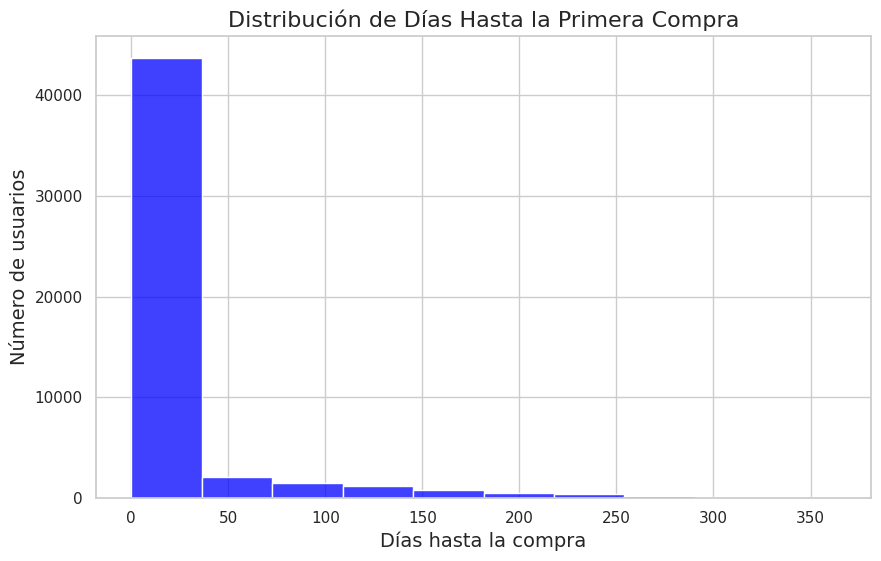

In [90]:
#Podemos observa que el valor máximo de conversión es de hasta casi un año completo. Para dar una mejor idea de cuanto estan tardando en ser clientes los usuarios haremos una gráfica de histograma.

# Configurar el estilo de los gráficos
sns.set(style="whitegrid")

# Crear un histograma
plt.figure(figsize=(10, 6))
sns.histplot(data=orders, x='lapso_conversion', bins=10, kde=False, color="blue")

# Personalizar el gráfico
plt.title('Distribución de Días Hasta la Primera Compra', fontsize=16)
plt.xlabel('Días hasta la compra', fontsize=14)
plt.ylabel('Número de usuarios', fontsize=14)

# Mostrar el gráfico
plt.show()


Podemos observar que la gran gran mayoria de usuarios realiza se convierte en cliente en menos de 50 dias.

In [91]:
#Con la información que tenemos haremos un análisis de cohortes mensuales:

# Obtenemos las fechas más tempranas
visits_first = visits.groupby('uid')['start_ts'].min().reset_index()
orders_first = orders.groupby('uid')['buy_ts'].min().reset_index()

# Juntamos las tablas.
cohort_data = visits_first.merge(orders_first, on='uid', how='left')
cohort_data['mes_primera_visita'] = cohort_data['start_ts'].dt.to_period('M')
cohort_data['mes_primera_compra'] = cohort_data['buy_ts'].dt.to_period('M')
cohort_data['dias_hasta_compra'] = (cohort_data['buy_ts'] - cohort_data['start_ts']).dt.days

# Crear la tabla dinámica para el análisis de cohortes
cohort_table = cohort_data.pivot_table(
    index='mes_primera_visita', 
    columns='mes_primera_compra', 
    values='dias_hasta_compra',  
    aggfunc='mean' 
)

# Renombrar índices y columnas para claridad--Este paso también se consultó.
cohort_table.index.name = 'Mes de Primera Visita'
cohort_table.columns.name = 'Mes de Primera Compra'

# Mostrar la tabla de cohortes
print(cohort_table)

Mes de Primera Compra   2017-06    2017-07    2017-08    2017-09     2017-10  \
Mes de Primera Visita                                                          
2017-06                0.663866  26.705882  62.805970  92.700935  122.285714   
2017-07                     NaN   0.730747  27.231579  61.434343   87.740000   
2017-08                     NaN        NaN   0.636589  23.618644   57.815217   
2017-09                     NaN        NaN        NaN   0.799734   22.548507   
2017-10                     NaN        NaN        NaN        NaN    0.696357   
2017-11                     NaN        NaN        NaN        NaN         NaN   
2017-12                     NaN        NaN        NaN        NaN         NaN   
2018-01                     NaN        NaN        NaN        NaN         NaN   
2018-02                     NaN        NaN        NaN        NaN         NaN   
2018-03                     NaN        NaN        NaN        NaN         NaN   
2018-04                     NaN        N

<AxesSubplot:title={'center':'Dias de conversion promedio cohortes semanales'}, xlabel='Mes de Primera Compra', ylabel='Mes de Primera Visita'>

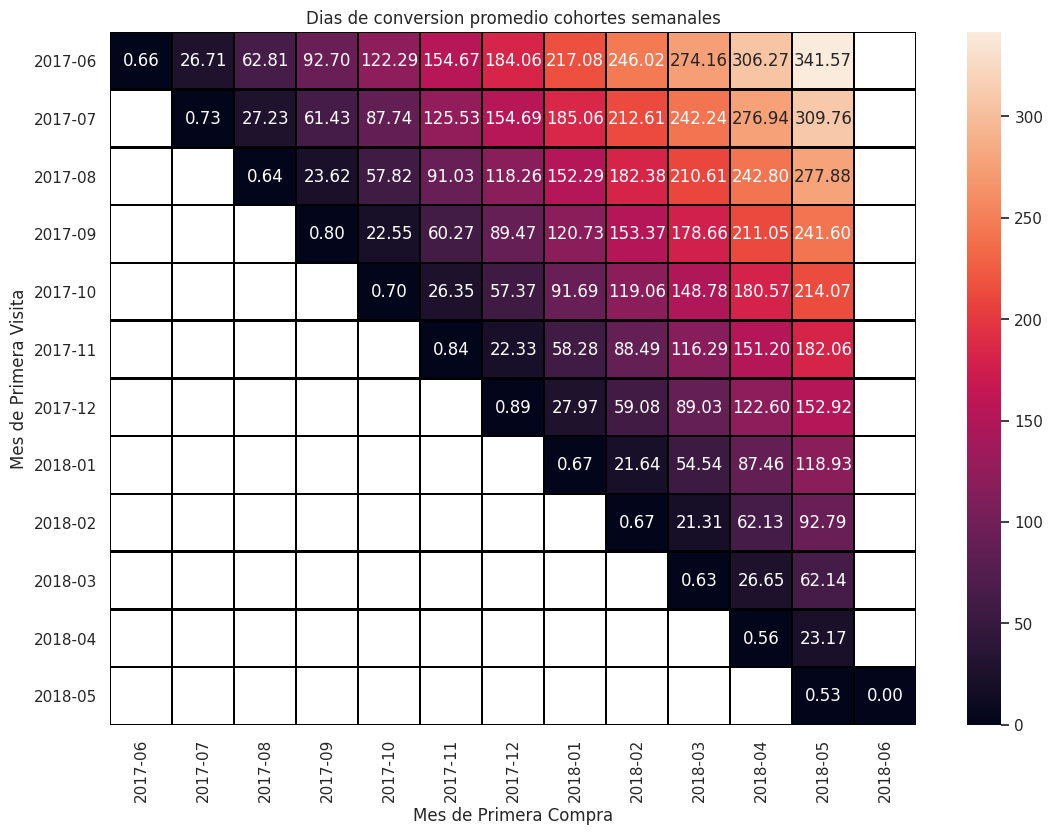

In [92]:
#Creamos un heatmap para visualizar las cohortes calculadas:

plt.figure(figsize=(13,9))
plt.title('Dias de conversion promedio cohortes semanales') 
sns.heatmap(
    cohort_table,
    annot=True,
    fmt='.2f',
    linewidths=1,
    linecolor='black',)

In [93]:
#Ahora procedemos a calcular el promedio de pedidos que realizan los usuarios de cohortes mensuales cada trimestre.
#Para ello agregaremos la columna con la división trimestral a nuestra tabla de ordenes.

orders['trimestre_pedido'] = orders['buy_ts'].dt.to_period('Q')

#Unimos la información generada

pedidos_trimestrales = orders.merge(cohort_data[['uid','mes_primera_visita']], on='uid',how='left')

In [94]:
# Contar pedidos por usuario por trimestre y cohorte mensual
pedidos_por_usuario = pedidos_trimestrales.groupby(
    ['mes_primera_visita', 'trimestre_pedido']
).agg({'uid': 'count'}).reset_index()

# Cambiar nombre a las columnas
pedidos_por_usuario.rename(columns={'uid': 'cantidad_pedidos'}, inplace=True)

# Calcular el número de usuarios únicos por cohorte mensual
usuarios_por_cohorte = cohort_data.groupby('mes_primera_visita')['uid'].nunique()

# Unir con el conteo de pedidos para calcular promedio
pedidos_por_usuario = pedidos_por_usuario.merge(
    usuarios_por_cohorte.rename('usuarios_cohorte'),
    on='mes_primera_visita',
    how='left'
)

# Calcular el promedio de pedidos por usuario
pedidos_por_usuario['promedio_pedidos'] = (
    pedidos_por_usuario['cantidad_pedidos'] / pedidos_por_usuario['usuarios_cohorte']
)

In [95]:
# Crear tabla de cohortes mensuales con pedidos por trimestre
cohortes_pedidos = pedidos_por_usuario.pivot_table(
    index='mes_primera_visita',
    columns='trimestre_pedido',
    values='promedio_pedidos',
    aggfunc='mean'
)

print(cohortes_pedidos)

trimestre_pedido     2017Q2    2017Q3    2017Q4    2018Q1    2018Q2
mes_primera_visita                                                 
2017-06             0.17754  0.083113  0.108907  0.076778  0.036126
2017-07                 NaN  0.179909  0.042466  0.034170  0.013242
2017-08                 NaN  0.154307  0.053629  0.034771  0.016403
2017-09                 NaN  0.150862  0.065613  0.031190  0.012512
2017-10                 NaN       NaN  0.201909  0.026908  0.011125
2017-11                 NaN       NaN  0.171682  0.036333  0.011560
2017-12                 NaN       NaN  0.157868  0.038626  0.010725
2018-01                 NaN       NaN       NaN  0.161200  0.009592
2018-02                 NaN       NaN       NaN  0.162049  0.012119
2018-03                 NaN       NaN       NaN  0.149449  0.022731
2018-04                 NaN       NaN       NaN       NaN  0.145458
2018-05                 NaN       NaN       NaN       NaN  0.162182


<AxesSubplot:title={'center':'Pedidos promedio cada trimestre por usuarios de cohortes mensuales'}, xlabel='trimestre_pedido', ylabel='mes_primera_visita'>

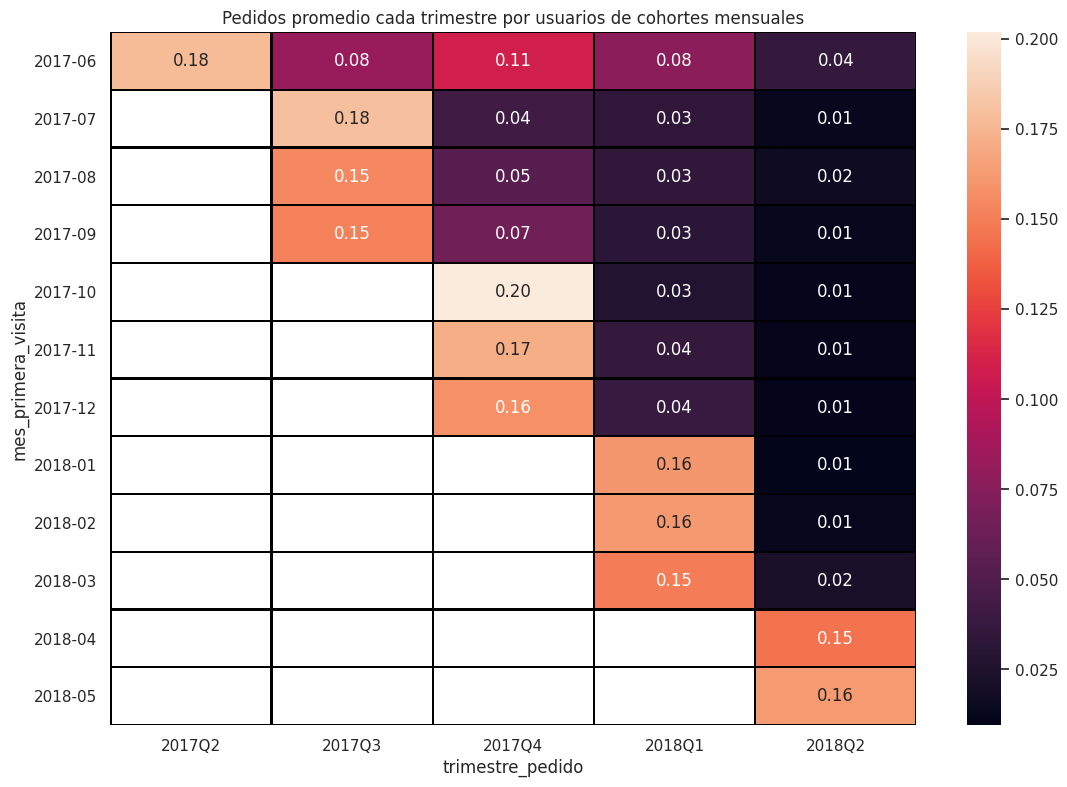

In [96]:
#Creamos un heatmap para visualizar las cohortes calculadas:

plt.figure(figsize=(13,9))
plt.title('Pedidos promedio cada trimestre por usuarios de cohortes mensuales') 
sns.heatmap(
    cohortes_pedidos,
    annot=True,
    fmt='.2f',
    linewidths=1,
    linecolor='black',)

#Conclusiones
Podemos observar que en el tercer trimestre hay una ligera mejoría al menos para la primera cohorte, por lo que habria que analizar qué impacto pudo haber tenido el marketing o la temporalidad en ese periodo de tiempo.

In [97]:
#Procedemos a calcular el tamaño promedio de la compra para las cohortes.
#Para ello aprovechamos que ya tenemos cohortes mensuales de usuario.

# Unimos los datos de la distintas tablas para nuestro calculo.
pedidos_con_revenue = orders.merge(
    cohort_data[['uid', 'mes_primera_visita']],
    on='uid',
    how='left'
)

# Agregar columna de mes del pedido
pedidos_con_revenue['mes_pedido'] = pedidos_con_revenue['buy_ts'].dt.to_period('M')


In [98]:
#Agrupamos los cohortes mensuales con el mes de los pedidos para luego sumar las cantidades de revenue.

revenue_mensual = pedidos_con_revenue.groupby(
    ['mes_primera_visita', 'mes_pedido']
)['revenue'].sum().reset_index()

# Contar usuarios únicos en cada cohorte
usuarios_por_cohorte = cohort_data.groupby('mes_primera_visita')['uid'].nunique().rename('usuarios_cohorte')

# Unir revenue mensual con el número de usuarios por cohorte
revenue_mensual = revenue_mensual.merge(
    usuarios_por_cohorte,
    on='mes_primera_visita',
    how='left'
)

# Calcular el promedio de revenue mensual por usuario
revenue_mensual['promedio_revenue_mensual'] = (
    revenue_mensual['revenue'] / revenue_mensual['usuarios_cohorte']
)

In [99]:
#Por ultimo creamos al pivot table con los datos ordenados:
tabla_revenue = revenue_mensual.pivot_table(
    index='mes_primera_visita',
    columns='mes_pedido',
    values='promedio_revenue_mensual',
    aggfunc='mean'
)

print(tabla_revenue)

mes_pedido          2017-06   2017-07   2017-08   2017-09   2017-10   2017-11  \
mes_primera_visita                                                              
2017-06             0.72083  0.200964  0.110468  0.292789  0.297201  0.213024   
2017-07                 NaN  0.751514  0.080615  0.084391  0.074807  0.064459   
2017-08                 NaN       NaN  0.612397  0.097959  0.098355  0.092939   
2017-09                 NaN       NaN       NaN  0.739775  0.221533  0.126355   
2017-10                 NaN       NaN       NaN       NaN  0.706868  0.146662   
2017-11                 NaN       NaN       NaN       NaN       NaN  0.606716   
2017-12                 NaN       NaN       NaN       NaN       NaN       NaN   
2018-01                 NaN       NaN       NaN       NaN       NaN       NaN   
2018-02                 NaN       NaN       NaN       NaN       NaN       NaN   
2018-03                 NaN       NaN       NaN       NaN       NaN       NaN   
2018-04                 NaN 

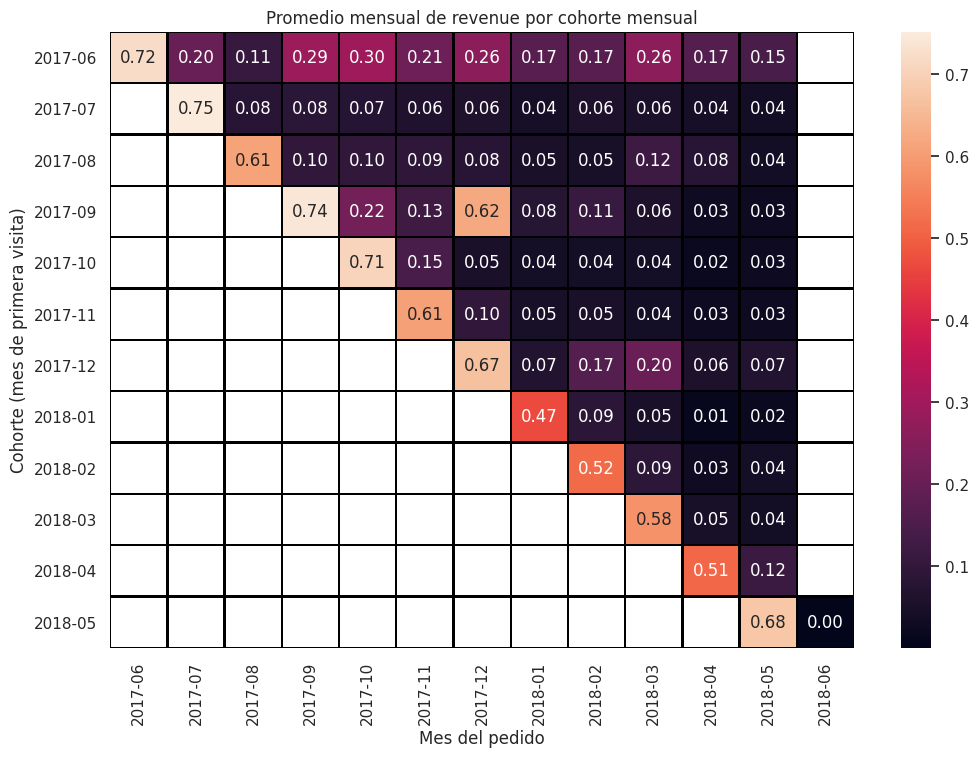

In [100]:
#Creamos la gráfica para interpretar los resultados.

plt.figure(figsize=(12, 8))
sns.heatmap(
    tabla_revenue, 
    annot=True, 
    fmt=".2f", 
    linewidths=1,
    linecolor='black',)
plt.title("Promedio mensual de revenue por cohorte mensual")
plt.ylabel("Cohorte (mes de primera visita)")
plt.xlabel("Mes del pedido")
plt.show()

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>

<b>Éxito</b> - ¡Impresionante análisis de ventas y cohortes! La implementación de cohortes mensuales para analizar la conversión, los pedidos por trimestre y el tamaño promedio de las compras es una estrategia avanzada y muy efectiva para obtener insights sobre el comportamiento de los clientes. La integración de histogramas y heatmaps para visualizar los resultados facilita la interpretación de las tendencias y mejora significativamente la calidad del análisis. Además, el uso de cálculos como el tiempo hasta la conversión y los promedios trimestrales demuestra un entendimiento sólido de las métricas clave del negocio.

</div>

# LTV

In [101]:
#Ahora procedemos a calcular el LTV de los usuarios.
#En primera instancia exploremos un poco nuestro DF de orders.

orders['buy_ts'].describe()

count                   50415
unique                  45991
top       2018-05-31 10:13:00
freq                        9
first     2017-06-01 00:10:00
last      2018-06-01 00:02:00
Name: buy_ts, dtype: object

<AxesSubplot:xlabel='buy_ts', ylabel='Count'>

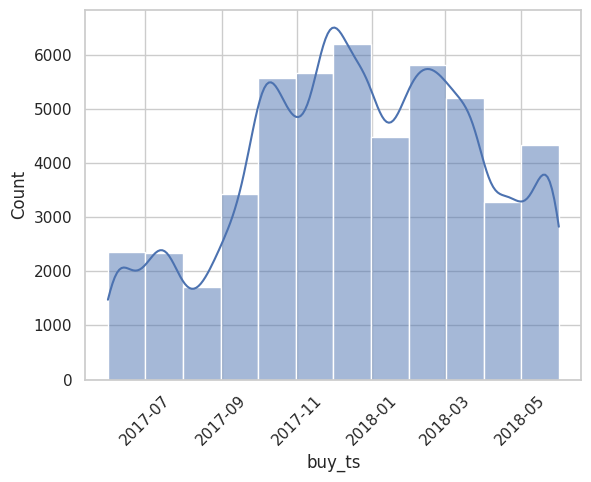

In [102]:
#Con la descripción sencilla inicial haremos una pequeña visualización para apreciar el comportamiento de las compras.

plt.xticks(rotation=45)
sns.histplot(orders['buy_ts'].astype("datetime64"),bins=12, kde=True)

Podemos observar que alrededor de septiembre de 2017 hubo un incremento en las compras por lo que podria indicar  algo que se realizó bien desde las campañas publicitarias. Por otro lado las mayores ventas fueron alrededor de diciembre 2017 con un buen desempeño de nuevo en febrero de 2018.

<AxesSubplot:xlabel='dt', ylabel='Count'>

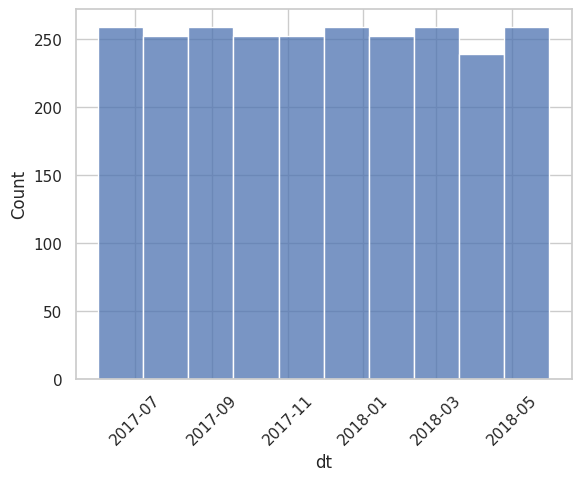

In [103]:
#Procedemos a un analisis sencillo de la tabla de costos.

costs['dt'].describe()

plt.xticks(rotation=45)
sns.histplot(costs['dt'].astype("datetime64"),bins=10)

In [104]:
#Procedemos a realizar hacer slices mensuales de nuestros datos para el calculo de LTV.

orders['order_month'] = orders['buy_ts'].astype('datetime64[M]')
costs['month'] = costs['dt'].astype('datetime64[M]')

#Ahora recuperamos el mes de la primera compra de cada cliente

first_orders = orders.groupby('uid').agg({'order_month': 'min'}).reset_index()
first_orders.columns = ['uid', 'mes_primera_compra']
first_orders.head()

,uid,mes_primera_compra
0,313578113262317,2018-01-01
1,1575281904278712,2017-06-01
2,2429014661409475,2017-10-01
3,2464366381792757,2018-01-01
4,2551852515556206,2017-11-01


In [105]:
#Obtenemos el número de nuevos clientes para cada mes:

cohort_sizes = first_orders.groupby('mes_primera_compra').agg({'uid': 'nunique'}).reset_index()
cohort_sizes.columns = ['mes_primera_compra', 'n_buyers']
cohort_sizes.head()

,mes_primera_compra,n_buyers
0,2017-06-01,2023
1,2017-07-01,1923
2,2017-08-01,1370
3,2017-09-01,2581
4,2017-10-01,4340


In [106]:
#Para crear los cohortes vamos a agregar los meses de la primera compra de los clientes a una tabla de pedidos.Si bien ya teniamos una columna con la fecha de primera compra, obtamos por crear una que solo exprese el mes.

orders_ = pd.merge(orders,first_orders, on='uid')
orders_.head()


,buy_ts,revenue,uid,fecha_primera_compra,fecha_primera_visita,lapso_conversion,trimestre_pedido,order_month,mes_primera_compra
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,2017-06-01 00:09:00,0,2017Q2,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,2017-06-01 00:14:00,0,2017Q2,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,2017-06-01 00:25:00,0,2017Q2,2017-06-01,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00,2017-06-01 00:14:00,0,2017Q2,2017-06-01,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00,2017-06-01 07:31:00,0,2017Q2,2017-06-01,2017-06-01


In [107]:
#Ya con nuestra tabla intermedia ahora agrupamos las tablas de pedidos por mes de la primera compra y mes de la compra y totalizar ingresos.
cohorts = orders_.groupby(['mes_primera_compra','order_month']).agg({'revenue': 'sum'}).reset_index()
cohorts.head()


,mes_primera_compra,order_month,revenue
0,2017-06-01,2017-06-01,9557.49
1,2017-06-01,2017-07-01,981.82
2,2017-06-01,2017-08-01,885.34
3,2017-06-01,2017-09-01,1931.30
4,2017-06-01,2017-10-01,2068.58


In [108]:
#Ahora unimos datos para integrar la columna con los usuarios nuevos para efectos de poder calcular el LTV.

report=pd.merge(cohort_sizes, cohorts, on='mes_primera_compra')
report.head()

,mes_primera_compra,n_buyers,order_month,revenue
0,2017-06-01,2023,2017-06-01,9557.49
1,2017-06-01,2023,2017-07-01,981.82
2,2017-06-01,2023,2017-08-01,885.34
3,2017-06-01,2023,2017-09-01,1931.30
4,2017-06-01,2023,2017-10-01,2068.58


In [109]:
#Continuamos con el cálculo de LTV considerando un margen de ganancia conservador de 5%

margin_rate = 0.5

report['gp'] = report['revenue'] * margin_rate
report['age'] = (report['order_month'] - report['mes_primera_compra']) / np.timedelta64(1, 'M')
report['age'] = report['age'].round().astype('int')

report.head()

,mes_primera_compra,n_buyers,order_month,revenue,gp,age
0,2017-06-01,2023,2017-06-01,9557.49,4778.745,0
1,2017-06-01,2023,2017-07-01,981.82,490.910,1
2,2017-06-01,2023,2017-08-01,885.34,442.670,2
3,2017-06-01,2023,2017-09-01,1931.30,965.650,3
4,2017-06-01,2023,2017-10-01,2068.58,1034.290,4


In [110]:
#Por último dividimos el beneficio bruto de las cohortes mensuales entre el número total de usuarios de cada cohorte y creamos la tabla dinámica.

report['ltv'] = report['gp'] / report['n_buyers']

output = report.pivot_table(
    index='mes_primera_compra', 
    columns='age', 
    values='ltv', 
    aggfunc='mean').round()

output.fillna('')


age,0,1,2,3,4,5,6,7,8,9,10,11
mes_primera_compra,,,,,,,,,,,,
2017-06-01,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-07-01,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,
2017-08-01,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,,
2017-09-01,3.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,,,
2017-10-01,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,,,,
2017-11-01,3.0,0.0,0.0,0.0,0.0,0.0,0.0,,,,,
2017-12-01,2.0,0.0,0.0,1.0,0.0,0.0,,,,,,
2018-01-01,2.0,0.0,0.0,0.0,0.0,,,,,,,
2018-02-01,2.0,0.0,0.0,0.0,,,,,,,,


Si bien podemos calcular el LTV para cada cohorte mensual, iremos un paso más allá para analizar junto con el CAC. Calcularemos los gastos totales de cada mes, para luego divir entre la cantidad de clientes en cada cohorte:

In [111]:
monthly_costs = costs.groupby('month').sum()
monthly_costs.head()

,source_id,costs
month,,
2017-06-01,1020,18015.00
2017-07-01,1054,18240.59
2017-08-01,1054,14790.54
2017-09-01,1020,24368.91
2017-10-01,1054,36322.88


In [112]:
#Agregamos los datos sobre costos para calcular el CAC.

report_ = pd.merge(report, monthly_costs, left_on='mes_primera_compra', right_on='month')
report_['cac'] = report_['costs'] / report_['n_buyers']
report_.head()

,mes_primera_compra,n_buyers,order_month,revenue,gp,age,ltv,source_id,costs,cac
0,2017-06-01,2023,2017-06-01,9557.49,4778.745,0,2.362207,1020,18015.0,8.905091
1,2017-06-01,2023,2017-07-01,981.82,490.910,1,0.242664,1020,18015.0,8.905091
2,2017-06-01,2023,2017-08-01,885.34,442.670,2,0.218819,1020,18015.0,8.905091
3,2017-06-01,2023,2017-09-01,1931.30,965.650,3,0.477336,1020,18015.0,8.905091
4,2017-06-01,2023,2017-10-01,2068.58,1034.290,4,0.511265,1020,18015.0,8.905091


Con la anterior información podremos calcular el Retorno en inversión de marketing o ROMI.

In [113]:
report_['romi'] = report_['ltv'] / report_['cac']
output = report_.pivot_table(
    index='mes_primera_compra', 
    columns='age', 
    values='romi', 
    aggfunc='mean')

output.cumsum(axis=1).round(2)

age,0,1,2,3,4,5,6,7,8,9,10,11
mes_primera_compra,,,,,,,,,,,,
2017-06-01,0.27,0.29,0.32,0.37,0.43,0.47,0.52,0.56,0.59,0.62,0.65,0.67
2017-07-01,0.32,0.33,0.37,0.39,0.40,0.40,0.41,0.42,0.43,0.43,0.44,NaN
2017-08-01,0.24,0.27,0.29,0.31,0.33,0.34,0.35,0.37,0.38,0.39,NaN,NaN
2017-09-01,0.30,0.36,0.39,0.60,0.62,0.65,0.69,0.70,0.71,NaN,NaN,NaN
2017-10-01,0.30,0.33,0.34,0.35,0.36,0.37,0.37,0.38,NaN,NaN,NaN,NaN
2017-11-01,0.28,0.30,0.31,0.33,0.34,0.34,0.34,NaN,NaN,NaN,NaN,NaN
2017-12-01,0.27,0.29,0.34,0.40,0.42,0.44,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,0.21,0.22,0.24,0.25,0.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,0.23,0.25,0.25,0.26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


De acuerdo a la tabla de ROMI que generamos hemos identificado que hay problemas ya que se está gastando más en marketing de lo que nos genera de ingreso. Con estos datos y las fechas quizá podremos identificar cuales son los canales más rentables.

In [114]:
#Revisamos un promedio general de todas las cohortes.
output.cumsum(axis=1).mean(axis=0)

age
0     0.270408
1     0.290992
2     0.315535
3     0.359870
4     0.391473
5     0.429938
6     0.448410
7     0.484976
8     0.526936
9     0.482244
10    0.547329
11    0.666991
dtype: float64

Identificamos que tardan en promedio hasta 9 meses para cubrir apenas el 50% de nuestros gastos por lo que debemos esperar retornos de inversion a largo plazo de más de 1 año de tiempo transcurrido.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>

<b>Éxito</b> - ¡Gran trabajo en esta sección! Has implementado un cálculo detallado y bien fundamentado del LTV (Lifetime Value) y ROMI (Retorno sobre la Inversión de Marketing), utilizando cohortes mensuales y vinculándolos con los costos y márgenes de beneficio. El análisis visual, como los histogramas para identificar patrones de compras y costos, es un excelente complemento para el entendimiento de los datos. Además, la integración de conceptos clave como el CAC (Costo de Adquisición de Clientes) y la comparación con el LTV demuestra una visión estratégica de negocio sólida.

</div> 

## Marketing

In [115]:
#Procedemos a realizar un mayot análisis a los gastos de marketing:

costs.head()

,source_id,dt,costs,month
0,1,2017-06-01,75.20,2017-06-01
1,1,2017-06-02,62.25,2017-06-01
2,1,2017-06-03,36.53,2017-06-01
3,1,2017-06-04,55.00,2017-06-01
4,1,2017-06-05,57.08,2017-06-01


In [116]:
costs['dt'].describe()

count                    2542
unique                    364
top       2017-06-28 00:00:00
freq                        7
first     2017-06-01 00:00:00
last      2018-05-31 00:00:00
Name: dt, dtype: object

In [117]:
costs['costs'].sum()

329131.62

Hemos identificado que a lo largo de un año el gasto en marketing es de $329,131.62

In [118]:
#Ahora analizamos un poco más a detalle nuestra tabla de visitas para identificar dispositivos y el origen(source) del tráfico a nuestro web.
visits.value_counts('device')

device
desktop    262567
touch       96833
dtype: int64

In [119]:
visits.value_counts('source_id')

source_id
4     101794
3      85610
5      66905
2      47626
1      34121
9      13277
10     10025
7         36
6          6
dtype: int64

In [120]:
#Ahora identificaremos cuanto se gasto en marketing por fuente de adquisicion:
costs.groupby('source_id')['costs'].sum()

source_id
1      20833.27
2      42806.04
3     141321.63
4      61073.60
5      51757.10
9       5517.49
10      5822.49
Name: costs, dtype: float64

Ahora buscaremos cuanto se gasto por fuente de adquisición a lo largo del tiempo.

In [121]:
#Convertimos la columna de fecha para obtener el mes:

costs['month'] = pd.to_datetime(costs['month']).dt.to_period('M')

#Ahora calcular los gastos totales por fuente y por mes:

gasto_mensual = costs.groupby(['source_id','month'])['costs'].sum().reset_index()
print(gasto_mensual)

#Con una pivot table mostramos los datos obtenidos:
tabla_gasto = gasto_mensual.pivot_table(
    index='source_id',
    columns='month',
    values='costs',
    aggfunc='sum'
)

print(tabla_gasto)

    source_id    month    costs
0           1  2017-06  1125.61
1           1  2017-07  1072.88
2           1  2017-08   951.81
3           1  2017-09  1502.01
4           1  2017-10  2315.75
..        ...      ...      ...
79         10  2018-01   614.35
80         10  2018-02   480.88
81         10  2018-03   526.41
82         10  2018-04   388.25
83         10  2018-05   409.86

[84 rows x 3 columns]
month      2017-06  2017-07  2017-08  2017-09   2017-10   2017-11   2017-12  \
source_id                                                                     
1          1125.61  1072.88   951.81  1502.01   2315.75   2445.16   2341.20   
2          2427.38  2333.11  1811.05  2985.66   4845.00   5247.68   4897.80   
3          7731.65  7674.37  6143.54  9963.55  15737.24  17025.34  16219.52   
4          3514.80  3529.73  3217.36  5192.26   6420.84   5388.82   7680.47   
5          2616.12  2998.14  2185.28  3849.14   5767.40   6325.34   5872.52   
9           285.22   302.54   248.93   4

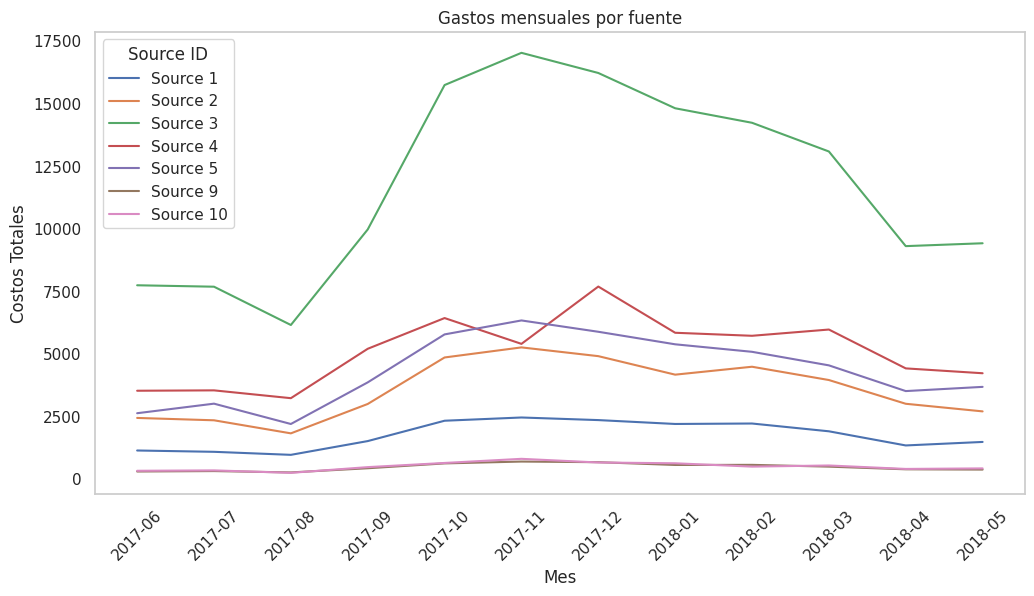

In [122]:
#Con nuestra tabla informacional completada procedemos a crear una visualización:

plt.figure(figsize=(12,6))
for source in gasto_mensual['source_id'].unique():
    data= gasto_mensual[gasto_mensual['source_id'] == source]
    plt.plot(data['month'].astype(str),data['costs'], label=f'Source {source}')

plt.title('Gastos mensuales por fuente')
plt.xlabel('Mes')
plt.ylabel('Costos Totales')
plt.legend(title='Source ID')
plt.grid()
plt.xticks(rotation=45)
plt.show()

Hemos obtenido una excelente visualizacion de los gastos por fuente de markenting a lo largo del tiempo. Podemos observar un fuerte gasto para la fuente 3 así como un ligero pico a finales de año para la fuente 4. Habrá que considerar si estos gastos realmente fueron una buena inversión por que considerando que para el ciclo de 1 año que estamos analizando de acuerdo a los datos,  tienen un ROMI de 0.7 por lo que de poder reducir en un 50% nuestro gasto en publicidad podria regresarnos a numero sanos.

Calcularemos el CAC por fuente.

In [123]:
#Asignaremos a una variable el la suma de gastos por fuente y renombraremos las columnas.

total_costos_por_fuente = costs.groupby('source_id')['costs'].sum().reset_index()
total_costos_por_fuente.rename(columns={'costs': 'total_costs'}, inplace=True)

#Para poder relacionar las tablas y los datos, creamos la variable con los cleintes que han comprado:
clientes= orders['uid'].unique()

#Hacemos la relación entre tablas filtrando para obtener solo los clientes visitantes que realizaron una compra y la fuente de marketing de donde provienen:

visitas_clientes = visits[visits['uid'].isin(clientes)]

# Calcular el número de clientes adquiridos por fuente
clientes_por_fuente = visitas_clientes.groupby('source_id')['uid'].nunique().reset_index()
clientes_por_fuente.rename(columns={'uid': 'clientes_adquiridos'}, inplace=True)

In [124]:
#Ahora combinamos los gastos con los costos para obtener el cac:
total_costos_por_fuente = costs.groupby('source_id')['costs'].sum().reset_index()
total_costos_por_fuente.rename(columns={'costs': 'total_costs'}, inplace=True)

# Combinar costos y clientes adquiridos
cac_data = total_costos_por_fuente.merge(clientes_por_fuente, on='source_id')
cac_data['CAC'] = cac_data['total_costs'] / cac_data['clientes_adquiridos']

print(cac_data)

   source_id  total_costs  clientes_adquiridos        CAC
0          1     20833.27                 7138   2.918642
1          2     42806.04                 7305   5.859828
2          3    141321.63                13846  10.206676
3          4     61073.60                14253   4.284965
4          5     51757.10                10156   5.096209
5          9      5517.49                 2793   1.975471
6         10      5822.49                 1773   3.283976


## Calculo de ROMI por fuente 

In [126]:
#Para un dato final de ROMI por fuente, calculamos los ingresos totales por fuente:

ingresos_por_fuente = visits.merge(orders, on='uid', how='inner')
ingresos_por_fuente = ingresos_por_fuente.groupby('source_id')['revenue'].sum().reset_index()
ingresos_por_fuente.rename(columns={'revenue': 'ingresos_totales'}, inplace=True)

#Combinamos los ingreso y costos para obtener la métrica:
romi_data = total_costos_por_fuente.merge(ingresos_por_fuente, on='source_id')
romi_data['ROMI'] = (romi_data['ingresos_totales'] - romi_data['total_costs']) / romi_data['total_costs']

print(romi_data)

   source_id  total_costs  ingresos_totales        ROMI
0          1     20833.27      2.298200e+06  109.313944
1          2     42806.04      2.638189e+06   60.631237
2          3    141321.63      2.966880e+05    1.099381
3          4     61073.60      4.966902e+05    7.132649
4          5     51757.10      1.181477e+06   21.827344
5          9      5517.49      3.634225e+04    5.586736
6         10      5822.49      1.461923e+04    1.510821


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>

<b>Éxito</b> - ¡Gran trabajo en esta sección! Has realizado un análisis exhaustivo de los gastos de marketing, vinculando los costos con las fuentes de adquisición y evaluando métricas clave como el CAC (Costo de Adquisición de Clientes) y el ROMI (Retorno sobre la Inversión de Marketing). La visualización de los gastos mensuales por fuente es particularmente efectiva para identificar tendencias y patrones, y demuestra una excelente habilidad para representar datos complejos de manera comprensible. El enfoque en relacionar los costos con los ingresos y los clientes adquiridos resalta un análisis centrado en resultados accionables.

</div>

# Gráfica final

Realizamos una gráfica para con facilidad conjuntar todos los datos importantes y tomar decisiones informadas de acuerdo a las fuentes de marketing (tuve que consultar varios pasos para lograr este porque ya se siente bastante más avanzando poner 2 ejes y y 2 ejes X etc. ;) )

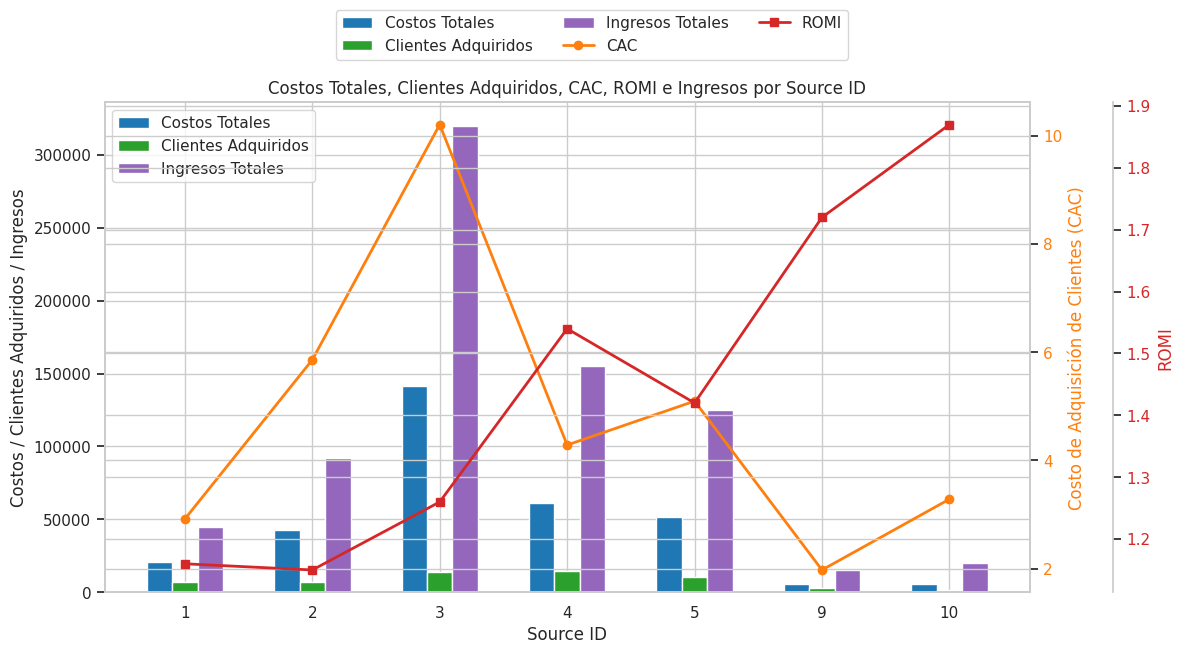

In [129]:
data = {
    'source_id': [1, 2, 3, 4, 5, 9, 10],
    'total_costs': [20833.27, 42806.04, 141321.63, 61073.60, 51757.10, 5517.49, 5822.49],
    'clientes_adquiridos': [7138, 7305, 13846, 14253, 10156, 2793, 1773],
    'CAC': [2.918642, 5.859828, 10.206676, 4.284965, 5.096209, 1.975471, 3.283976],
    'revenue_total': [45000, 92000, 320000, 155000, 125000, 15000, 20000],  # Ingresos Totales
    'ROMI': [1.16, 1.15, 1.26, 1.54, 1.42, 1.72, 1.87]  # Retorno sobre la inversión
}

df = pd.DataFrame(data)

fig, ax1 = plt.subplots(figsize=(12, 6))

# Asignamos colores para mejor lectura de los datos.
color1 = 'tab:blue'    # Costos Totales
color2 = 'tab:green'   # Clientes Adquiridos
color3 = 'tab:orange'  # CAC
color4 = 'tab:purple'  # Ingresos Totales
color5 = 'tab:red'     # ROMI

# Eje y para costos, clientes adquiridos e ingresos totales
x = np.arange(len(df['source_id']))
width = 0.2 

# Barras de costos totales, clientes adquiridos e ingresos totales
bars1 = ax1.bar(x - width, df['total_costs'], width, label='Costos Totales', color=color1)
bars2 = ax1.bar(x, df['clientes_adquiridos'], width, label='Clientes Adquiridos', color=color2)
bars3 = ax1.bar(x + width, df['revenue_total'], width, label='Ingresos Totales', color=color4)

ax1.set_xlabel('Source ID')
ax1.set_ylabel('Costos / Clientes Adquiridos / Ingresos')
ax1.set_title('Costos Totales, Clientes Adquiridos, CAC, ROMI e Ingresos por Source ID')
ax1.set_xticks(x)
ax1.set_xticklabels(df['source_id'])
ax1.legend(loc='upper left')

# Eje y secundario para el CAC
ax2 = ax1.twinx()
line1 = ax2.plot(x, df['CAC'], label='CAC', color=color3, marker='o', linewidth=2)
ax2.set_ylabel('Costo de Adquisición de Clientes (CAC)', color=color3)
ax2.tick_params(axis='y', labelcolor=color3)

# Eje y terciario para el ROMI
ax3 = ax1.twinx()
ax3.spines["right"].set_position(("outward", 60))  # Mover el tercer eje a la derecha
line2 = ax3.plot(x, df['ROMI'], label='ROMI', color=color5, marker='s', linewidth=2)
ax3.set_ylabel('ROMI', color=color5)
ax3.tick_params(axis='y', labelcolor=color5)

# Ajustar leyendas
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines3, labels3 = ax3.get_legend_handles_labels()
fig.legend(lines1 + lines2 + lines3, labels1 + labels2 + labels3, loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=3)

# Mostrar la gráfica
plt.tight_layout()
plt.show()

# Conclusiones

Basándonos en la información que hemos obtenido podemos recomendar eliminar las fuentes de gasto en marketing de las fuentes 1 y 2 por su bajo ROMI. De la fuente 3, es de analizarse ya que si bien nos da un ROMI positivo y es el que más ingresos genera, el costo de adquisición de clientes es el más alto por lo que se podria recomendar eliminar ese gasto y concentrarse en aquellos más redituables como el 4 o 5. También dependerá de si se considera que la cuota de mercado que entrega vale el gasto ya que la fuente 4 es la segunda fuente que adquiere clientes. 
El gasto y ROMI de la fuente 4 es de resultados sólidos por la relación de CAC y ROMI por lo que una estrategia podria ser eliminar el gasto en la fuente 3 y enfocarse en la fuente 4 que es la de mejores resultados y que adquiere mayor cantidad de clientes. 
La fuente 5 tiene un comportamiento estable por lo que podria dejarse tal cual o reducir su gasto.
Para las fuentes 9 y 10 es de notar que su gasto, ingreso y cuota de mercado es casi imperceptible sin embargo tienen un ROMI muy redituable por lo que se observan posibles oportunidades de incrementar los ingresos. Una recomendación es explorar crecer el gasto en estas fuentes para observar su comportamiento y si el ROMI se mantiene, pero recalcando su potencial de excelente ROMI.
En resumen se recomienda eliminar gastos en las fuentes 1, 2 y 3 para luego incrementar en 9 y 10 y posiblemente 4. Así mismo determinar si mantener la fuente 5 o reducir redirigir la inversión a otros con mayor potencial.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>

<b>Éxito</b> - ¡Excelente visualización! Has logrado combinar múltiples métricas clave (costos totales, clientes adquiridos, ingresos totales, CAC y ROMI) en un solo gráfico, lo cual facilita una comprensión clara y completa del desempeño de cada fuente de adquisición. El uso de líneas y barras para representar diferentes dimensiones es muy efectivo, y la inclusión de un eje secundario para el ROMI y el CAC muestra un entendimiento avanzado de las herramientas de visualización.

</div>

### Comentario Final del Revisor

<div class="alert alert-block alert-success">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

¡Felicidades! Has realizado un análisis muy completo y detallado en todas las secciones de tu proyecto. Tu enfoque metódico en la preparación de datos, cálculo de métricas clave, visualización de resultados y generación de insights demuestra una sólida comprensión del análisis de datos aplicado a un contexto empresarial. 

#### Puntos Positivos:
- **Preparación de datos**: Excelente trabajo al limpiar y transformar los datos para que fueran fácilmente analizables. Esto establece una base sólida para las etapas posteriores del análisis.
- **Análisis detallado**: La incorporación de cohortes, LTV, CAC y ROMI no solo añade valor a tu análisis, sino que también refleja un entendimiento profundo de los indicadores clave de desempeño.
- **Visualizaciones claras**: Tus gráficos, como el análisis de gastos de marketing y el comportamiento de las cohortes, son efectivos y fáciles de interpretar, lo que mejora la comunicación de tus hallazgos.

#### Áreas para Mejorar:
- **Interpretación más profunda**: Aunque los cálculos y visualizaciones están muy bien realizados, podrías incluir un análisis más detallado de las posibles causas y estrategias para mejorar métricas como el ROMI o el CAC.
- **Recomendaciones accionables**: Enfatiza propuestas específicas para optimizar el rendimiento de las fuentes de adquisición y el retorno de la inversión en marketing.

! 💪🚀😊

</div> 